In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 348.9MB 52kB/s 
     |████████████████████████████████| 3.1MB 49.1MB/s 
     |████████████████████████████████| 501kB 54.6MB/s 
2.0.0-beta1


In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

W0718 16:30:06.976897 139639418169216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2949 - accuracy: 0.9134 - val_loss: 0.1339 - val_accuracy: 0.9594
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1452 - accuracy: 0.9564 - val_loss: 0.1063 - val_accuracy: 0.9681
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1100 - accuracy: 0.9664 - val_loss: 0.0879 - val_accuracy: 0.9722
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0902 - accuracy: 0.9721 - val_loss: 0.0737 - val_accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0765 - accuracy: 0.9758 - val_loss: 0.0747 - val_accuracy: 0.9748
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0699 - val_accuracy: 0.9772
Epoch 7/10
60000/60000 [==============================]

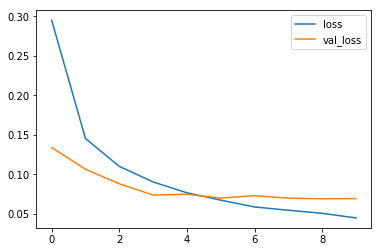

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

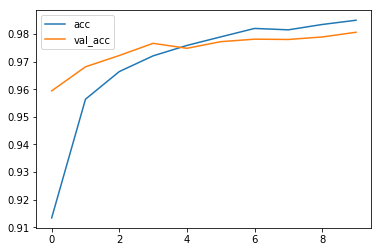

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 55us/sample - loss: 0.0692 - accuracy: 0.9806
[0.06924617666350968, 0.9806]


Confusion matrix, without normalization
[[ 972    0    1    1    0    0    2    1    2    1]
 [   0 1126    2    2    0    0    2    0    3    0]
 [   2    1 1015    3    1    0    1    4    4    1]
 [   1    0    1  996    0    2    0    3    3    4]
 [   1    1    2    1  959    0    5    3    1    9]
 [   2    1    0   12    1  868    2    2    3    1]
 [   5    3    1    1    1    3  939    0    5    0]
 [   2   10   12    3    0    0    0  994    3    4]
 [   6    0    3    2    3    1    0    2  953    4]
 [   2    2    0    3   12    3    0    3    0  984]]


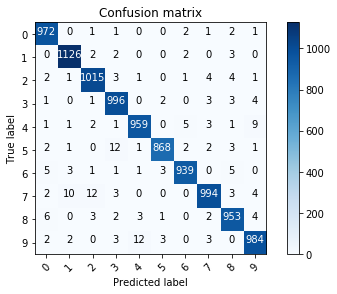

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

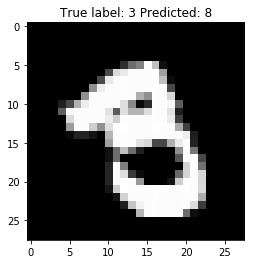

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));